#### Import relevant libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### Load dataset

In [5]:
marketing_data = pd.read_csv("Data/marketing_campaign.csv")

#### Subset for relevant columns

In [6]:
marketing_data = marketing_data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                                 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 
                                 'NumWebVisitsMonth']]

#### Inspect first 5 rows and data types of the dataset

In [7]:
marketing_data.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,635,88,546,172,88,88,3,8,10,4,7
1,11,1,6,2,1,6,2,1,1,2,5
2,426,49,127,111,21,42,1,8,2,10,4
3,11,4,20,10,3,5,2,2,0,4,6
4,173,43,118,46,27,15,5,5,3,6,5


In [8]:
marketing_data.shape

(2240, 11)

In [9]:
marketing_data.dtypes

MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
dtype: object

#### Check for missing values and remove them

In [10]:
marketing_data.isnull().sum()

MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [11]:
marketing_data.dropna(inplace=True)

In [12]:
marketing_data.shape

(2240, 11)

#### Scale the data

In [13]:
scaler = StandardScaler()
marketing_data_scaled = scaler.fit_transform(marketing_data)

#### Build Kmeans model

In [14]:
kmeans = KMeans(n_clusters= 4, init='k-means++',random_state= 1)

label = kmeans.fit_predict(marketing_data_scaled)

#### Visualise Data

In [15]:
marketing_data_test = marketing_data.copy()
marketing_data_test['label'] = label
marketing_data_test['label'] = marketing_data_test['label'].astype(str)

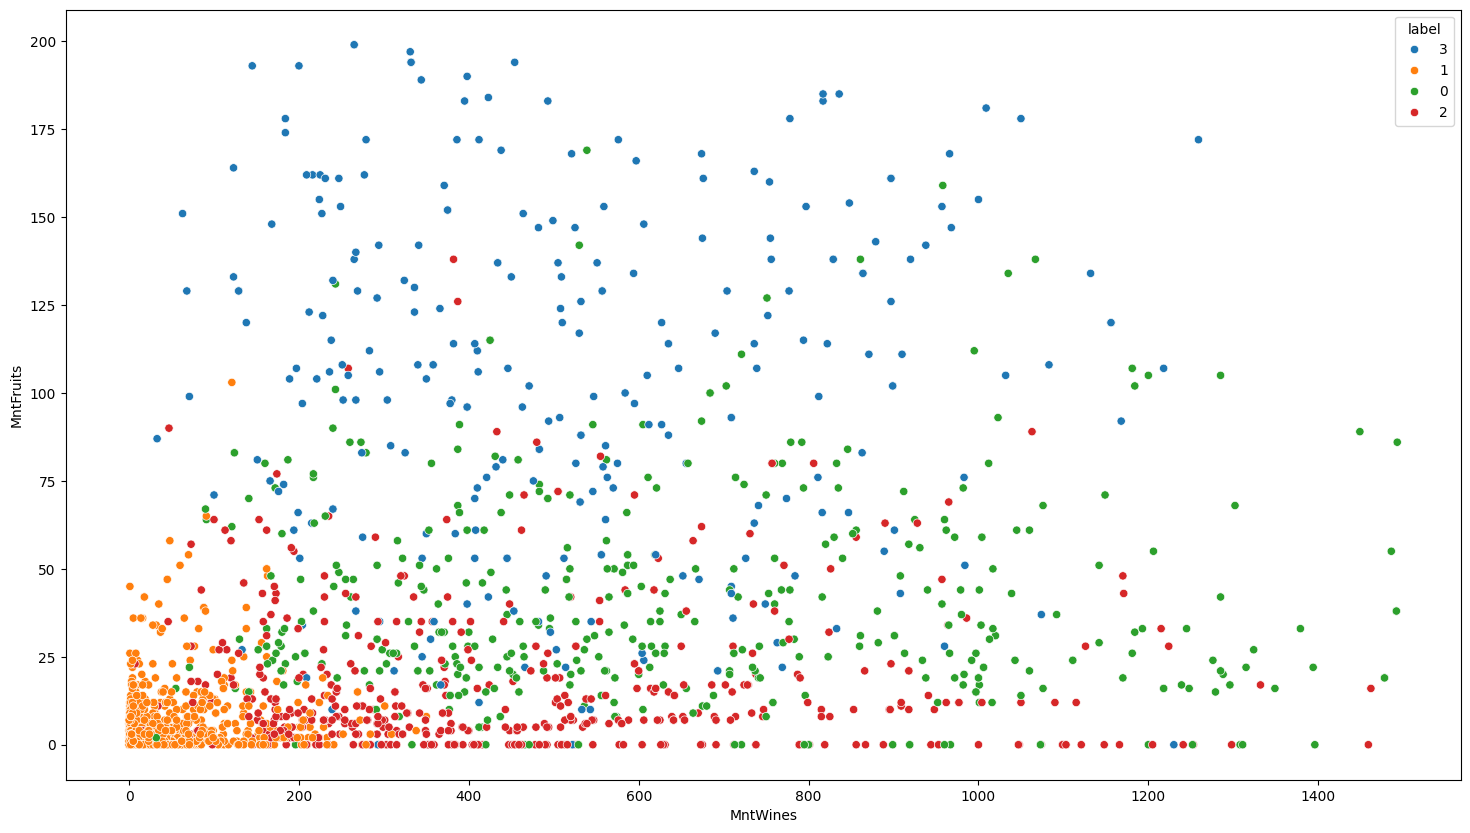

In [16]:
plt.figure(figsize= (18,10))
sns.scatterplot(x= marketing_data_test['MntWines'], y= marketing_data_test['MntFruits'], hue = marketing_data_test['label'])
plt.show()